
# Chapter 3

This notebook is a lab walkthrough from the book Introduction to Statistical Learning with Python. This lab covers Linear regression and some python basics as it is the first lab in this series. This lab will be posted on github and portfolio for myself to reference and to show experience with the material.

# Lab: Linear Regression

## Importing packages

In [90]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots


### New imports
Throughout this lab we will introduce new functions and libraries. However,
we will import them here to emphasize these are the new
code objects in this lab. Keeping imports near the top
of a notebook makes the code more readable, since scanning the first few
lines tells us what libraries are used.

In [4]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#from ISLP import load_data
#from ISLP.models import (ModelSpec as MS, summarize,poly)



 We will provide relevant details about the
functions below as they are needed.

Besides importing whole modules, it is also possible
to import only a few items from a given module. This
will help keep the  *namespace* clean.
We will use a few specific objects from the `statsmodels` package
which we import here.

## Simple Linear Regression
In this section we will  construct model 
matrices (also called design matrices) using the `ModelSpec()`  transform from `ISLP.models`.

We  will use the `Boston` housing data set. The `Boston` dataset records  `medv`  (median house value) for $506$ neighborhoods
around Boston.  We will build a regression model to predict  `medv`  using $13$
predictors such as  `rmvar`  (average number of rooms per house),
 `age`  (proportion of owner-occupied units built prior to 1940), and  `lstat`  (percent of
households with low socioeconomic status).  We will use `statsmodels` for this
task, a `Python` package that implements several commonly used
regression methods.


Here is information regarding the column abbreviations in the dataset

* `crim`: per capita crime rate by town.
* `zn`: proportion of residential land zoned for lots over 25,000 sq.ft.
* `indus`: proportion of non-retail business acres per town.
* `chas`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
* `nox`: nitrogen oxides concentration (parts per 10 million).
* `rm`: average number of rooms per dwelling.
* `age`: proportion of owner-occupied units built prior to 1940.
* `dis`: weighted mean of distances to five Boston employment centres.
* `rad`: index of accessibility to radial highways.
* `tax`: full-value property-tax rate per $10,000.
* `ptratio`: pupil-teacher ratio by town.
* `lstat`: lower status of the population (percent).
* `medv`: median value of owner-occupied homes in $1000s.

In [5]:
Boston = pd.read_csv("data/Boston.csv")
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


We start by using the `sm.OLS()`  function to fit a
simple linear regression model.  Our response will be
 `medv`  and  `lstat`  will be the single predictor.
For this model, we can create the model matrix by hand.


In [11]:
X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]),
                  'lstat': Boston['lstat']})
X[:4]


,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


We extract the response, and fit the model.

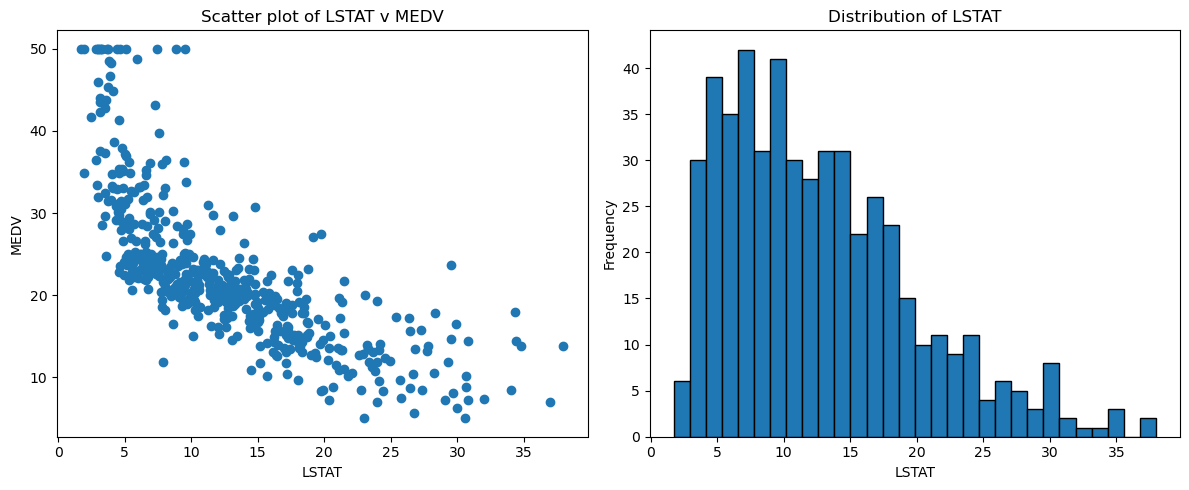

In [54]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Assuming X is your DataFrame as defined earlier
# Extracting lstat values
lstat = X['lstat']
medv = Boston['medv']
# Plot scatter plot on the first subplot
axs[0].scatter(lstat, medv)
axs[0].set_ylabel('MEDV')
axs[0].set_xlabel('LSTAT')
axs[0].set_title('Scatter plot of LSTAT v MEDV')

# Plot histogram on the second subplot
axs[1].hist(lstat, bins=30, edgecolor='black')
axs[1].set_xlabel('LSTAT')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Distribution of LSTAT')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

Looks like there is a linear realtionship here between LSTAT and MEDV, so lets fit a linear model to it

In [5]:
y = Boston['medv'] #assign the y value
model = sm.OLS(y, X) #specify the model and the parameters (y being dependent, x independent) 
#sm.OLS for y and X creates a matrix equation, which is why we create a matrix model for X
results = model.fit() #fit the model


Note that `sm.OLS()` does
not fit the model; it specifies the model, and then `model.fit()` does the actual fitting.  

`summarize()` produces a table of the parameter estimates,
their standard errors, t-statistics and p-values.
The function takes a single argument, such as the object `results` 
returned here by the `fit`
method, and returns such a summary.

In [6]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           5.08e-88
Time:                        07:58:56   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Before we describe other methods for working with fitted models, we outline a more useful and general framework for constructing a model matrix~`X`.
### Using Transformations: Sklearns Fit and Transform
Our model above has a single predictor, and constructing `X` was straightforward. 
In practice  we often fit models with more than one predictor, typically selected from an array or data frame.
We may wish to introduce transformations to the variables before fitting the model, specify interactions between variables, and expand some particular variables into sets of variables (e.g. polynomials).
The `sklearn`  package has a particular notion
for this type of task: a *transform*. A transform is an object
that is created with some parameters as arguments. The
object has two main methods: `fit()` and `transform()`.

We provide a general approach for specifying models and constructing
the model matrix through the transform `ModelSpec()` in the `ISLP` library.
`ModelSpec()`
(renamed `MS()` in the preamble) creates a
transform object, and then a pair of methods
`transform()` and `fit()` are used to construct a
corresponding model matrix.

We first describe this process for our simple regression model  using a single predictor `lstat` in
the `Boston` data frame, but will use it repeatedly in more
complex tasks in this and other labs in this book.
In our case the transform is created by the expression
`design = MS(['lstat'])`.

The `fit()`  method takes the original array and may do some
initial computations on it, as specified in the transform object.
For example, it may compute means and standard deviations for centering and scaling.
The `transform()` 
method applies the fitted transformation to the array of data, and produces the model matrix.


In [30]:
# Extracting the predictor variable 'lstat'
X = Boston[['lstat']]

# Adding a constant (intercept) to the predictor variable
X = sm.add_constant(X)

# Fitting the model
model = sm.OLS(Boston['medv'], X)  # Assuming 'medv' is your target variable
result = model.fit()

# Transforming the original data according to the specified design
# This line transforms the original data based on the model's design
# You don't really need to explicitly do this in statsmodels
# The fitted model already contains the transformed data
X_transformed = result.model.exog

# Displaying the transformed data (first 4 rows)
# This line prints the first 4 rows of the transformed data
print(X_transformed[:4])

[[1.   4.98]
 [1.   9.14]
 [1.   4.03]
 [1.   2.94]]


This code achieves the same result as the previous one but in a more concise way. You directly use sm.add_constant() to add the intercept, and the transformed data is then accessible via the fitted model's model.exog attribute.

In [34]:
# Extracting the predictor variable 'lstat'
X = Boston[['lstat']]
Y = Boston['medv']

# Fitting the model to object named 'results'
results = sm.OLS(Y, sm.add_constant(X)).fit()

#In this simple case, the fit() method does very little; it simply checks that the variable 'lstat' specified in 'model' exists
results.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           5.08e-88
Time:                        09:55:02   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The fitted coefficients can also be retrieved as the
`params` attribute of `results`.

In [53]:
print(results.params[0])
print(results.params[1])
print(results.params)


34.5538408793831
-0.9500493537579899
const    34.553841
lstat    -0.950049
dtype: float64


C:\Users\gfulham\AppData\Local\Temp\ipykernel_16824\888829731.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(results.params[0])
C:\Users\gfulham\AppData\Local\Temp\ipykernel_16824\888829731.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(results.params[1])


In [33]:

# This line here is redundant but allows us to see how statsmodels creates a model matrix for the predictor variable
# This creates the model matrix
X_transformed = results.model.exog

# Displaying the transformed data (first 4 rows)
print(X_transformed[:4])

[[1.   4.98]
 [1.   9.14]
 [1.   4.03]
 [1.   2.94]]


Note that, as in the previous code chunk when the two steps were done separately, the `design` object is changed as a result of the `fit()` operation. The power of this pipeline will become clearer when we fit more complex models that involve interactions and transformations.

Let's return to our fitted regression model.
The object
`results` has several methods that can be used for inference.
We already presented a function `summarize()` for showing the essentials of the fit.
For a full and somewhat exhaustive summary of the fit, we can use the `summary()` 
method.

The `get_prediction()`  method can be used to obtain predictions, and produce confidence intervals and
prediction intervals for the prediction of  `medv`  for  given values of  `lstat`.

We first create a new data frame, in this case containing only the variable `lstat`, with the values for this variable at which we wish to make predictions.
We then use the `transform()` method of `design` to create the corresponding model matrix.

In [40]:
#create 3 data point data frame
new_df = pd.DataFrame({'lstat':[5, 10, 15]})
# transform it into a matrix model
#code used by ISLP "newX = design.transform(new_df)""
newX = sm.add_constant(new_df)
newX


,const,lstat
0,1.0,5
1,1.0,10
2,1.0,15


Next we compute the predictions at `newX`, and view them by extracting the `predicted_mean` attribute.

In [42]:
#obtain predictions for all x values
new_predictions = results.get_prediction();
#The predicted_mean attribute is one of the attributes of the prediction object returned by get_prediction()
new_predictions.predicted_mean

array([29.8225951 , 25.87038979, 30.72514198, 31.76069578, 29.49007782,
       29.60408375, 22.74472741, 16.36039575,  6.11886372, 18.30799693,
       15.1253316 , 21.94668596, 19.62856553, 26.70643322, 24.80633451,
       26.50692285, 28.30251613, 20.61661686, 23.44776393, 23.83728417,
       14.58380346, 21.41465832, 16.76891698, 15.66685973, 19.06803641,
       18.86852605, 20.48360995, 18.13698805, 22.39320915, 23.17224962,
       13.08272548, 22.16519731,  8.22797329, 17.12043524, 15.22983702,
       25.35736314, 23.71377775, 26.22190805, 24.92984093, 30.44962767,
       32.67274316, 29.95560201, 29.03405413, 27.48547369, 25.48086955,
       24.85383698, 21.11064252, 16.69291303,  5.28282029, 19.16304135,
       21.77567707, 25.59487547, 29.53758029, 26.54492483, 20.49311044,
       29.98410349, 29.07205611, 30.80114593, 28.03650231, 25.79438584,
       22.06069188, 20.83512821, 28.16000873, 25.52837202, 26.90594358,
       30.1171104 , 24.8253355 , 26.85844111, 22.11769484, 26.20

In [41]:
#obtain predictions for new x values of 5, 10, 15 and assign to object new_predictions
new_predictions = results.get_prediction(newX);
#The predicted_mean attribute is one of the attributes of the prediction object returned by get_prediction()
new_predictions.predicted_mean


array([29.80359411, 25.05334734, 20.30310057])

In [18]:
#Produce confidence intervals for the predicted values.
new_predictions.conf_int(alpha=0.05)


array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

34.5538408793831
-0.9500493537579899


C:\Users\gfulham\AppData\Local\Temp\ipykernel_16824\3933074389.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(results.params[0])
C:\Users\gfulham\AppData\Local\Temp\ipykernel_16824\3933074389.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(results.params[1])


In [19]:
# Prediction intervals are computing by setting `obs=True`, meaning it also takes the observed values into account. 
new_predictions.conf_int(obs=True, alpha=0.05)


array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

### Explaination of results
The 95% confidence interval associated with an
`lstat`  value of 10 is (24.47, 25.63), and the 95% prediction
interval is (12.82, 37.28).  As expected, the confidence and
prediction intervals are centered around the same point (a predicted
value of 25.05 for  `medv`  when  `lstat`  equals
10), but the latter are substantially wider.

Next we will plot  `medv`  and  `lstat` 
using `DataFrame.plot.scatter()`, \definelongblankMR{plot.scatter()}{plot.slashslashscatter()}
and wish to
add the regression line to the resulting plot.

### Defining Functions

In [58]:
def abline(ax, b, m,*args, **kwargs): #ax is the plot which the line will be added, b is intercept, m is slope
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim() #finds limit of x axis
    ylim = [m * xlim[0] + b, m * xlim[1] + b] #lower limit of y and upper limit of y, creating two points on which the line is drawn
    ax.plot(xlim, ylim, *args, **kwargs)


The addition of `*args` allows any number of
non-named arguments to `abline`, while `*kwargs` allows any
number of named arguments (such as `linewidth=3`) to `abline`.
In our function, we pass
these arguments verbatim to `ax.plot` above. Readers
interested in learning more about
functions are referred to the section on
defining functions in [docs.python.org/tutorial](https://docs.python.org/3/tutorial/controlflow.html#defining-functions).

Let’s use our new function to add this regression line to a plot of
`medv` vs. `lstat`.

C:\Users\gfulham\AppData\Local\Temp\ipykernel_16824\1198889689.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0],
C:\Users\gfulham\AppData\Local\Temp\ipykernel_16824\1198889689.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1],


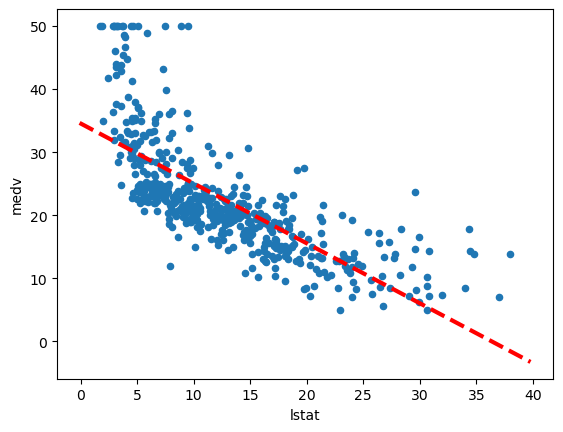

In [59]:
ax = Boston.plot.scatter('lstat', 'medv')
abline(ax,
       results.params[0],
       results.params[1],
       'r--',
       linewidth=3)

In [60]:
print(ax.get_xlim())


(-2.0752, 41.7752)


Thus, the final call to `ax.plot()` is `ax.plot(xlim, ylim, 'r--', linewidth=3)`.
We have used the argument `'r--'` to produce a red dashed line, and added
an argument to make it of width 3.
There is some evidence for non-linearity in the relationship between  `lstat`  and  `medv`. We will explore this issue later in this lab.

As mentioned above, there is an existing function to add a line to a plot --- `ax.axline()` --- but knowing how to write such functions empowers us to create more expressive displays.



Next we examine some diagnostic plots, several of which were discussed
in Section 3.3.3.
We can find the fitted values and residuals
of the fit as attributes of the `results` object.
Various influence measures describing the regression model
are computed with the `get_influence()` method.
As we will not use the `fig` component returned
as the first value from `subplots()`, we simply
capture the second returned value in `ax` below.

## Diagnostic Plots 
#### Creating residual plots to check assumptions in linear regression
Things we look for in residual plots:
* Pattern is linear
* Inepencedence of errors / randomness
* Constant variance of errors
* Normality of errors

The linear regression model assumes that there is a straight-line relationship between the predictors and the response. If the true relationship
is far from linear, then virtually all of the conclusions that we draw from
the ft are suspect. In addition, the prediction accuracy of the model can
be signifcantly reduced.
Residual plots are a useful graphical tool for identifying non-linearity. residual plot Given a simple linear regression model, we can plot the residuals, ei =
yi − yˆi, versus the predictor xi. In the case of a multiple regression model,
since there are multiple predictors, we instead plot the residuals versus
the predicted (or ftted) values yˆi. Ideally, the residual plot will show no ftted discernible pattern. The presence of a pattern may indicate a problem with
some aspect of the linear model.

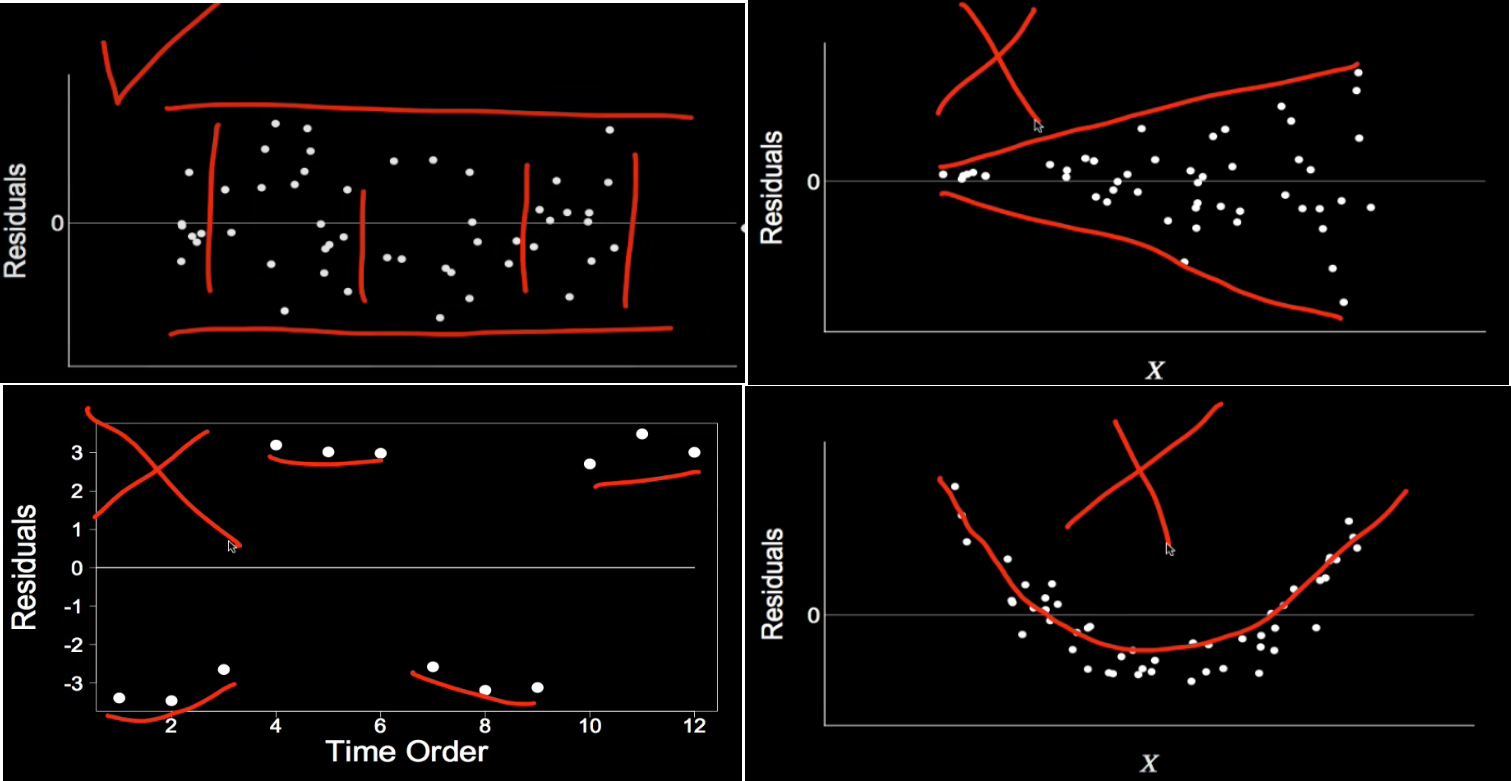

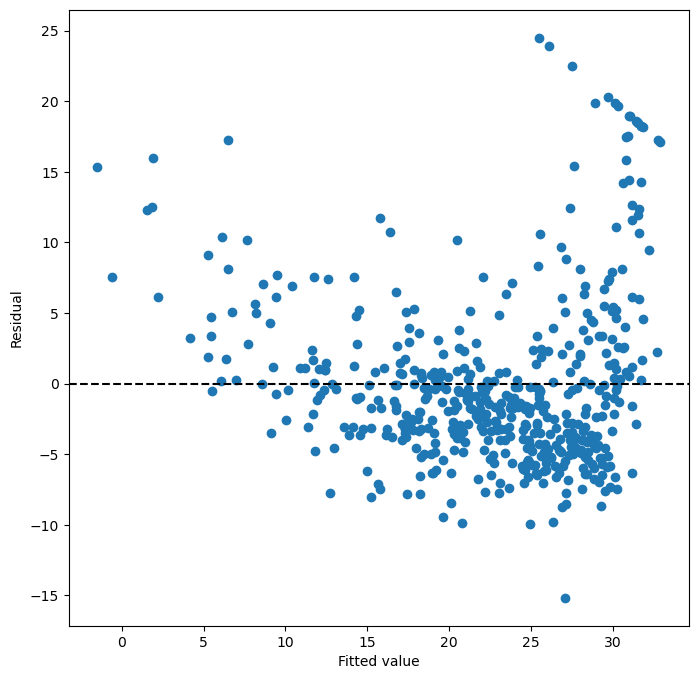

In [61]:
ax = subplots(figsize=(8,8))[1]
# fittedvalues are the predicted (fitted) values of the dependent variable
# resid are the error terms or the differences between the observed and predicted values
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');


 We add a horizontal line at 0 for reference using the
 `ax.axhline()`   method, indicating
it should be black (`c='k'`) and have a dashed linestyle (`ls='--'`).

On the basis of the residual plot, there is some evidence of non-linearity.
Leverage statistics can be computed for any number of predictors using the
`hat_matrix_diag` attribute of the value returned by the
`get_influence()`  method.

374

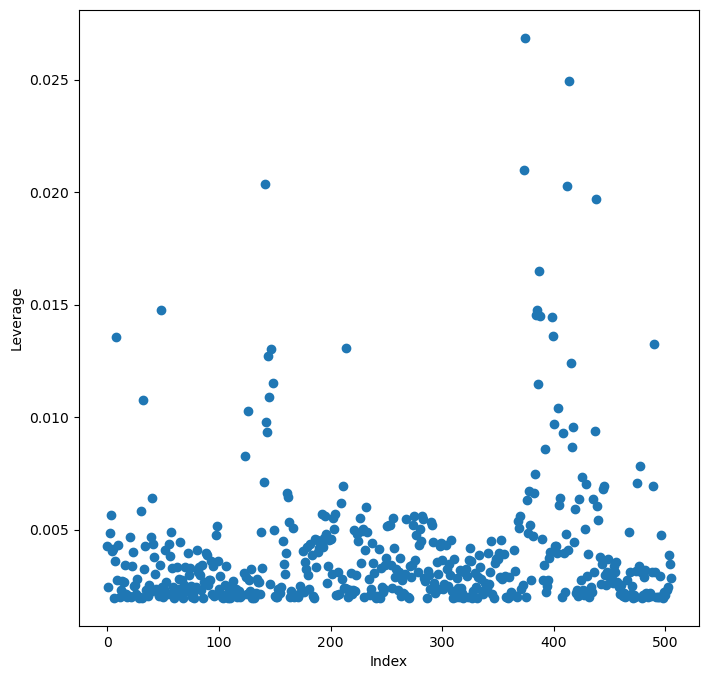

In [62]:
#helps youi find outliers
#Patterns or outliers in these plots may indicate observations with high leverage and warrant further investigation.

infl = results.get_influence() #Various infuence measures describing the regression model are computed with the get_influence() method.
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)


 The `np.argmax()`  function identifies the index of the largest element of an array, optionally computed over an axis of the array.
In this case, we maximized over the entire array
to determine which observation has the largest leverage statistic.

## Multiple Linear Regression
In order to fit a multiple linear regression model using least squares, we again use
the `ModelSpec()`  transform to construct the required
model matrix and response. The arguments
to `ModelSpec()` can be quite general, but in this case
a list of column names suffice. We consider a fit here with
the two variables `lstat` and `age`.

In [6]:
# Extracting the predictor variable 'lstat'
X = Boston[['lstat', 'age']]
Y = Boston['medv']

# Fitting the model to object named 'results'
results1 = sm.OLS(Y, sm.add_constant(X)).fit()

#In this simple case, the fit() method does very little; it simply checks that the variable 'lstat' specified in 'model' exists
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Wed, 20 Mar 2024   Prob (F-statistic):           2.98e-88
Time:                        14:58:48   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notice how we have compacted the first line into a succinct expression describing the construction of `X`.

The  `Boston`   data set contains 12 variables, and so it would be cumbersome
to have to type all of these in order to perform a regression using all of the predictors.
Instead, we can use the following short-hand:\definelongblankMR{columns.drop()}{columns.slashslashdrop()}

In [7]:
terms = Boston.columns.drop('medv')
terms


Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

We can now fit the model with all the variables in `terms` using
the same model matrix builder.

In [8]:
terms = Boston.columns.drop('medv')

X = Boston[terms]
Y = Boston['medv']

# Fitting the model to object named 'results'
results2 = sm.OLS(Y, sm.add_constant(X)).fit()

#In this simple case, the fit() method does very little; it simply checks that the variable 'lstat' specified in 'model' exists
results2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          2.23e-133
Time:                        14:58:53   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6173      4.936      8.431      0.000      31.919      51.316
crim          -0.1214      0.033     -3.678      0.000      -0.186      -0.057
zn             0.0470      0.014      3.384      0.001       0.020       0.074
indus          0.0135      0.062      0.217      0.829      -0.109       0.136
chas           2.8400      0.870      3.264      0.001       1.131       4.549
nox          -18.7580      3.851     -4.870      0.000     -26.325     -11.191
rm             3.6581      0.420      8.705      0.000       2.832       4.484
age            0.0036      0.013      0.271      0.787      -0.023       0.030
dis           -1.4908      0.202     -7.394      0.000      -1.887      -1.095
rad            0.2894      0.067      4.325      0.000       0.158       0.421
tax           -0.0127      0.004     -3.337      0.001      -0.020      -0.005
ptratio       -0.9375      0.132     -7.091      0.000      -1.197      -0.678
lstat         -0.5520      0.051    -10.897      0.000      -0.652      -0.452
==============================================================================
Omnibus:                      171.096   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              709.937
Skew:                           1.477   Prob(JB):                    6.90e-155
Kurtosis:                       7.995   Cond. No.                     1.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

What if we would like to perform a regression using all of the variables but one?  For
example, in the above regression output,   `age`  has a high $p$-value.
So we may wish to run a regression excluding this predictor.
The following syntax results in a regression using all predictors except  `age`.

In [10]:
minus_age = Boston.columns.drop(['medv', 'age']) 

X = Boston[minus_age]
Y = Boston['medv']

# Fitting the model to object named 'results'
minus_age_model = sm.OLS(Y, sm.add_constant(X)).fit()

#In this simple case, the fit() method does very little; it simply checks that the variable 'lstat' specified in 'model' exists
minus_age_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     124.1
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          2.03e-134
Time:                        14:59:55   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3034.
Df Residuals:                     494   BIC:                             3085.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.5251      4.920      8.441      0.000      31.859      51.191
crim          -0.1214      0.033     -3.683      0.000      -0.186      -0.057
zn             0.0465      0.014      3.379      0.001       0.019       0.074
indus          0.0135      0.062      0.217      0.829      -0.109       0.135
chas           2.8528      0.868      3.287      0.001       1.148       4.558
nox          -18.4851      3.714     -4.978      0.000     -25.782     -11.188
rm             3.6811      0.411      8.951      0.000       2.873       4.489
dis           -1.5068      0.193     -7.825      0.000      -1.885      -1.128
rad            0.2879      0.067      4.322      0.000       0.157       0.419
tax           -0.0127      0.004     -3.333      0.001      -0.020      -0.005
ptratio       -0.9346      0.132     -7.099      0.000      -1.193      -0.676
lstat         -0.5474      0.048    -11.483      0.000      -0.641      -0.454
==============================================================================
Omnibus:                      172.506   Durbin-Watson:                   1.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              724.941
Skew:                           1.485   Prob(JB):                    3.81e-158
Kurtosis:                       8.056   Cond. No.                     1.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Multivariate Goodness of Fit
We can access the individual components of `results` by name
(`dir(results)` shows us what is available). Hence
`results.rsquared` gives us the $R^2$,
and
`np.sqrt(results.scale)` gives us the RSE.

Variance inflation factors (section 3.3.3) are sometimes useful
to assess the effect of collinearity in the model matrix of a regression model.
We will compute the VIFs in our multiple regression fit, and use the opportunity to introduce the idea of *list comprehension*.

### List Comprehension
Often we encounter a sequence of objects which we would like to transform
for some other task. Below, we compute the VIF for each
feature in our `X` matrix and produce a data frame
whose index agrees with the columns of `X`.
The notion of list comprehension can often make such
a task easier.

List comprehensions are simple and powerful ways to form
lists of `Python` objects. The language also supports
dictionary and *generator* comprehension, though these are
beyond our scope here. Let's look at an example. We compute the VIF for each of the variables
in the model matrix `X`, using the function `variance_inflation_factor()`.


In [29]:
vals = [VIF(X, i)
        for i in range(1, X.shape[1])]
vif = pd.DataFrame({'vif':vals},
                   index=X.columns[1:])
vif


,vif
crim,1.767486
zn,2.298459
indus,3.987181
chas,1.071168
nox,4.369093
rm,1.912532
age,3.088232
dis,3.954037
rad,7.445301
tax,9.002158


The function `VIF()` takes two arguments: a dataframe or array,
and a variable column index. In the code above we call `VIF()` on the fly for all columns in `X`.  
We have excluded column 0 above (the intercept), which is not of interest. In this case the VIFs are not that exciting.

The object `vals` above could have been constructed with the following for loop:

### Interaction Terms

It is easy to include interaction terms in a linear model using ModelSpec(). Including a tuple ("lstat","age") tells the model matrix builder to include an interaction term between lstat and age.

In [25]:
# X = MS(['lstat',
#         'age',
#         ('lstat', 'age')]).fit_transform(Boston)
# model2 = sm.OLS(y, X)
# summarize(model2.fit())

Y = Boston['medv']

Boston['interaction_term'] = Boston['lstat'] * Boston['age'] #creating a new interaction term, aka new column in the boston dataset
X = Boston[['lstat', 'age', 'interaction_term']] #including the new term as a predictor value

interaction_model= sm.OLS(Y, sm.add_constant(X)).fit()


In [26]:
interaction_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Wed, 20 Mar 2024   Prob (F-statistic):           4.86e-88
Time:                        15:54:39   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               36.0885      1.470     24.553      0.000      33.201      38.976
lstat               -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age                 -0.0007      0.020     -0.036      0.971      -0.040       0.038
interaction_term     0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Non-linear Transformations of the Predictors
The model matrix builder can include terms beyond
just column names and interactions. For instance,
the `poly()` function supplied in `ISLP` specifies that
columns representing polynomial functions
of its first argument are added to the model matrix.

In [86]:
# X = MS([poly('lstat', degree=2), 'age']).fit_transform(Boston)
# model3 = sm.OLS(y, X)
# results3 = model3.fit()
# summarize(results3)

from sklearn.preprocessing import PolynomialFeatures

# set variables for single variable regression
y = Boston[['medv']] #dependent y
x = Boston[['lstat','age']] #independent x

polynomial_features = PolynomialFeatures(degree=2) #type of transformation and how many dregges is the polynomial
xp_lstat = polynomial_features.fit_transform(x[['lstat']]) #variable to transform

# Combine polynomial features of 'lstat' with 'age' column
xp = np.concatenate((xp_lstat, x[['age']]), axis=1)

poly_model = sm.OLS(y,sm.add_constant(xp)).fit()
poly_model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     337.3
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          7.03e-120
Time:                        17:35:24   Log-Likelihood:                -1561.0
No. Observations:                 506   AIC:                             3130.
Df Residuals:                     502   BIC:                             3147.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.2885      0.873     47.284      0.000      39.573      43.004
x1            -2.6883      0.131    -20.502      0.000      -2.946      -2.431
x2             0.0495      0.004     13.315      0.000       0.042       0.057
x3             0.0703      0.011      6.471      0.000       0.049       0.092
==============================================================================
Omnibus:                       81.499   Durbin-Watson:                   1.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.528
Skew:                           0.918   Prob(JB):                     1.69e-34
Kurtosis:                       5.001   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
anova_lm(results1, poly_model)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,503.0,19168.128609,0.0,NaN,NaN,NaN
1,502.0,14165.613251,1.0,5002.515357,177.278785,7.468491e-35


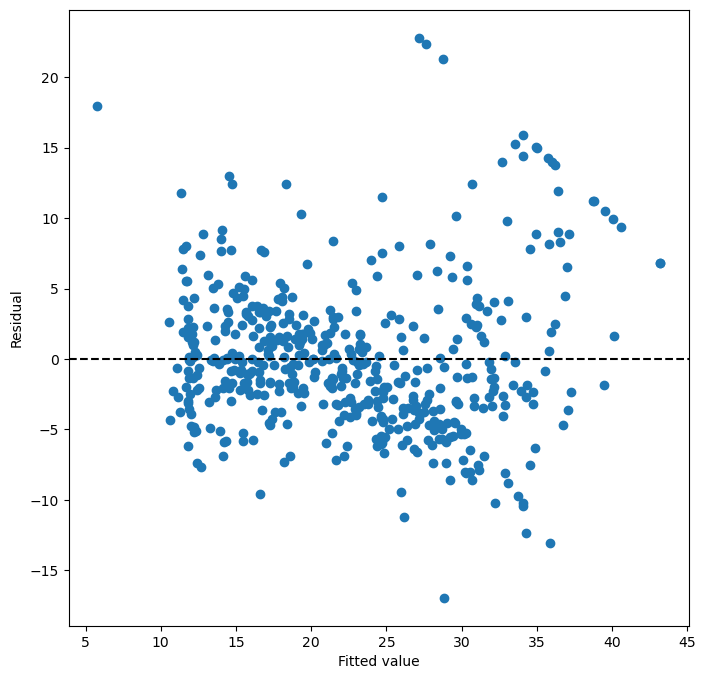

In [91]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(poly_model.fittedvalues, poly_model.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')

## Qualitative Predictors
Here we use the  `Carseats`  data, which is included in the
`ISLP` package. We will  attempt to predict `Sales`
(child car seat sales) in 400 locations based on a number of
predictors.

In [124]:
Carseats = pd.read_csv('data/Carseats.csv')
Carseats.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [125]:
encoder = OneHotEncoder()

# Fit and transform the data
encoded_data = encoder.fit_transform(Carseats[['ShelveLoc']])

# Convert the encoded sparse matrix to a dense array and create a DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['ShelveLoc']))

# Concatenate the original DataFrame with the encoded DataFrame
final_data = pd.concat([Carseats, encoded_df], axis=1)

# Print the final transformed dataset
final_data.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1.0,0.0,0.0
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,0.0,1.0,0.0
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,0.0,0.0,1.0
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0.0,0.0,1.0
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No,1.0,0.0,0.0


In [131]:
allvars = list(final_data.columns.drop(['ShelveLoc','Sales','Urban', 'US']))
allvars


['Unnamed: 0',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'ShelveLoc_Bad',
 'ShelveLoc_Good',
 'ShelveLoc_Medium',
 'interaction_income_advertising',
 'interaction_price_age']

In [132]:
y = Carseats['Sales']

final_data['interaction_income_advertising'] = Carseats['Income']* Carseats['Advertising']
final_data['interaction_price_age'] = Carseats['Price']* Carseats['Age']

final_columns = allvars + ['interaction_income_advertising', 'interaction_price_age']
final = final_data[final_columns]
final.dtypes


Unnamed: 0                          int64
CompPrice                           int64
Income                              int64
Advertising                         int64
Population                          int64
Price                               int64
Age                                 int64
Education                           int64
ShelveLoc_Bad                     float64
ShelveLoc_Good                    float64
ShelveLoc_Medium                  float64
interaction_income_advertising      int64
interaction_price_age               int64
interaction_income_advertising      int64
interaction_price_age               int64
dtype: object

In [133]:

car_model = sm.OLS(y,sm.add_constant(final)).fit()
car_model.summary()



# # Assuming Carseats is your DataFrame and 'Sales' is the dependent variable
# # Assuming 'Income', 'Advertising', 'Price', and 'Age' are columns in the Carseats dataset
# allvars = list(Carseats.columns.drop('Sales', 'ShelveLoc'))
# y = Carseats['Sales']

# # Create interaction variables
# Carseats['interaction_income_advertising'] = Carseats['Income'] * Carseats['Advertising']
# Carseats['interaction_price_age'] = Carseats['Price'] * Carseats['Age']

# # Define the final set of predictor variables
# final = pd.DataFrame({
#     'intercept': 1,  # Add intercept column
#     'interaction_income_advertising': Carseats['interaction_income_advertising'],
#     'interaction_price_age': Carseats['interaction_price_age']
# })

# # Concatenate other predictor variables
# for var in allvars:
#     final[var] = Carseats[var]

# # Fit the model
# model = sm.OLS(y, final)
# results = model.fit()

# # Summarize the results
# print(results.summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     226.4
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          1.35e-166
Time:                        18:08:33   Log-Likelihood:                -565.94
No. Observations:                 400   AIC:                             1158.
Df Residuals:                     387   BIC:                             1210.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              6.6306      0.751      8.828      0.000       5.154       8.107
Unnamed: 0                        -0.0002      0.000     -0.473      0.636      -0.001       0.001
CompPrice                          0.0932      0.004     22.589      0.000       0.085       0.101
Income                             0.0108      0.003      4.137      0.000       0.006       0.016
Advertising                        0.0633      0.021      3.011      0.003       0.022       0.105
Population                         0.0002      0.000      0.566      0.572      -0.001       0.001
Price                             -0.1004      0.007    -13.514      0.000      -0.115      -0.086
Age                               -0.0570      0.016     -3.582      0.000      -0.088      -0.026
Education                         -0.0209      0.020     -1.064      0.288      -0.059       0.018
ShelveLoc_Bad                     -0.0511      0.271     -0.188      0.851      -0.585       0.483
ShelveLoc_Good                     4.7826      0.260     18.388      0.000       4.271       5.294
ShelveLoc_Medium                   1.8992      0.256      7.430      0.000       1.397       2.402
interaction_income_advertising     0.0004      0.000      2.685      0.008       0.000       0.001
interaction_price_age           4.948e-05   6.66e-05      0.743      0.458   -8.14e-05       0.000
interaction_income_advertising     0.0004      0.000      2.685      0.008       0.000       0.001
interaction_price_age           4.948e-05   6.66e-05      0.743      0.458   -8.14e-05       0.000
==============================================================================
Omnibus:                        1.473   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.479   Jarque-Bera (JB):                1.344
Skew:                           0.140   Prob(JB):                        0.511
Kurtosis:                       3.043   Cond. No.                     5.64e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.07e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""